Jirat Hemmara

###Objective

Created a model of House_Price_Dataset data using linear regression to predict house prices using the data set's various factors.

###Load Dataset

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
#Dataset from Kaggle: https://www.kaggle.com/datasets/muhammadbinimran/housing-price-prediction-data
df = pd.read_csv('housing_price_dataset.csv')
df.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065


###Exploratory Data Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SquareFeet    50000 non-null  int64  
 1   Bedrooms      50000 non-null  int64  
 2   Bathrooms     50000 non-null  int64  
 3   Neighborhood  50000 non-null  object 
 4   YearBuilt     50000 non-null  int64  
 5   Price         50000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 2.3+ MB


In [ ]:
print(df.isnull().sum())
print(df.duplicated().sum())

SquareFeet      0
Bedrooms        0
Bathrooms       0
Neighborhood    0
YearBuilt       0
Price           0
dtype: int64
0


array([[<Axes: title={'center': 'SquareFeet'}>,
        <Axes: title={'center': 'Bedrooms'}>],
       [<Axes: title={'center': 'Bathrooms'}>,
        <Axes: title={'center': 'YearBuilt'}>],
       [<Axes: title={'center': 'Price'}>, <Axes: >]], dtype=object)

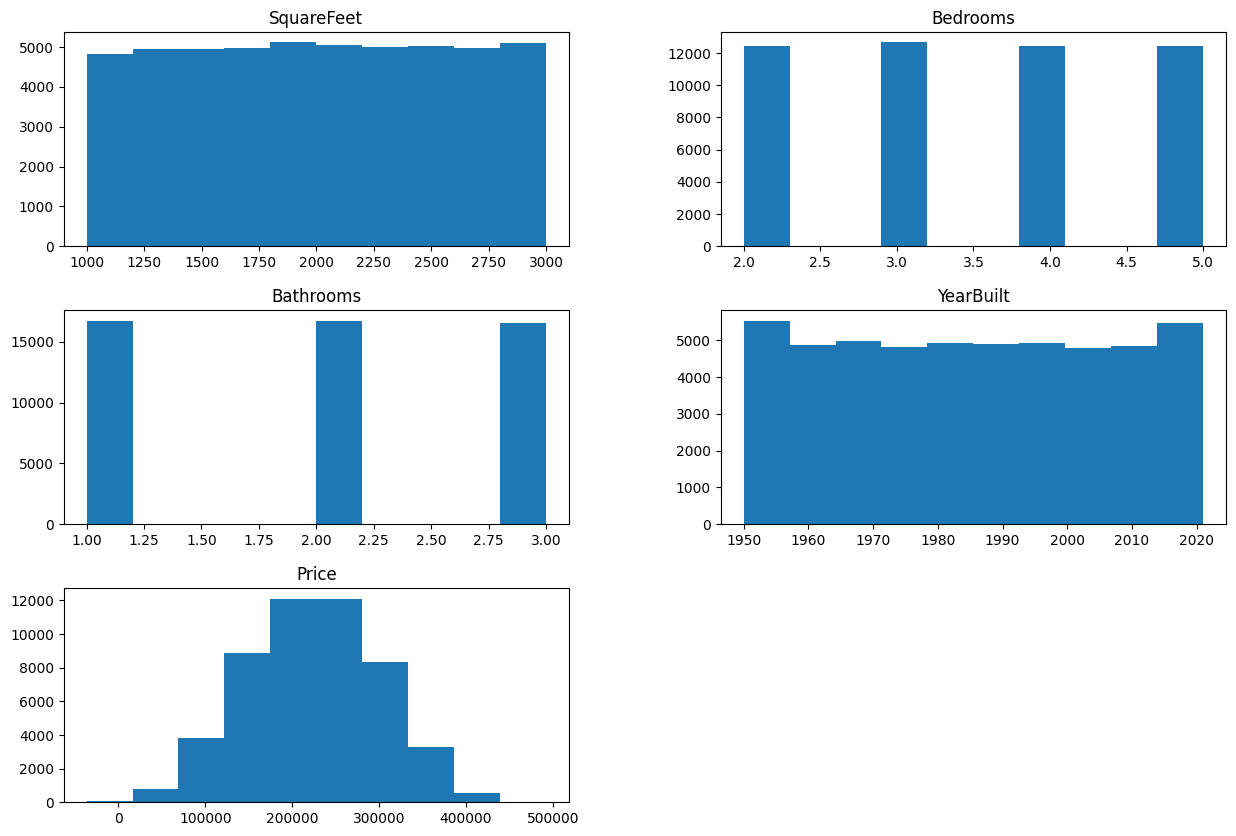

In [ ]:
# histograms
df.hist(bins=10,figsize=(15,10),grid=False)

In [ ]:
df.describe()

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2006.374680,3.498700,1.995420,1985.404420,224827.325151
std,575.513241,1.116326,0.815851,20.719377,76141.842966
min,1000.000000,2.000000,1.000000,1950.000000,-36588.165397
25%,1513.000000,3.000000,1.000000,1967.000000,169955.860225
50%,2007.000000,3.000000,2.000000,1985.000000,225052.141166
75%,2506.000000,4.000000,3.000000,2003.000000,279373.630052
max,2999.000000,5.000000,3.000000,2021.000000,492195.259972


จะพบว่า price มีช่วงค่าที่กว้างมากและการกระจายตัวของค่าข้อมูลอยู่ในรูปของ normal distribution จึงเลือกให้เป็น target ในการทำ linear  regression model

<ipython-input-338-6244f6ecc008>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = df.corr()


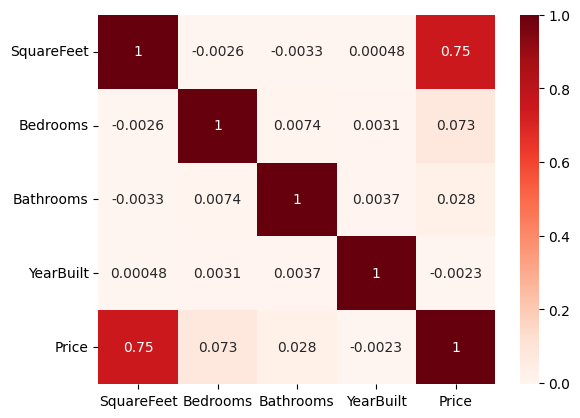

In [ ]:
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

พบว่า SquareFeet มีค่าความสัมพันธ์กับราคามากที่สุด

<Axes: xlabel='SquareFeet', ylabel='Price'>

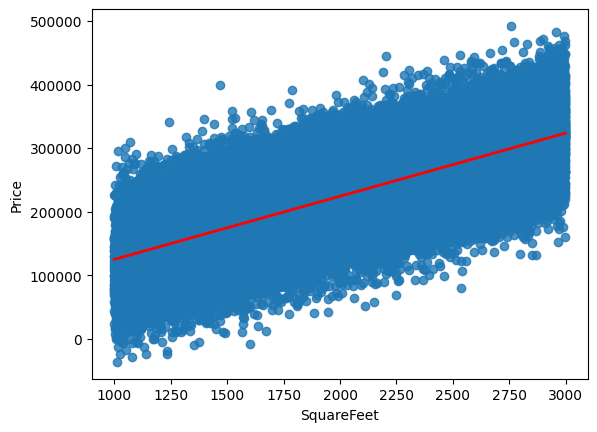

In [ ]:
x = df['SquareFeet']
y = df['Price']
sns.regplot(x=x, y=y, line_kws={'color': 'red', 'linewidth': 2})

จะพบว่าเมื่อค่า SquareFeet เพิ่มขึ้น, ค่า price จะเพิ่มขึ้นด้วย

Text(0.5, 1.0, 'Column: Price')

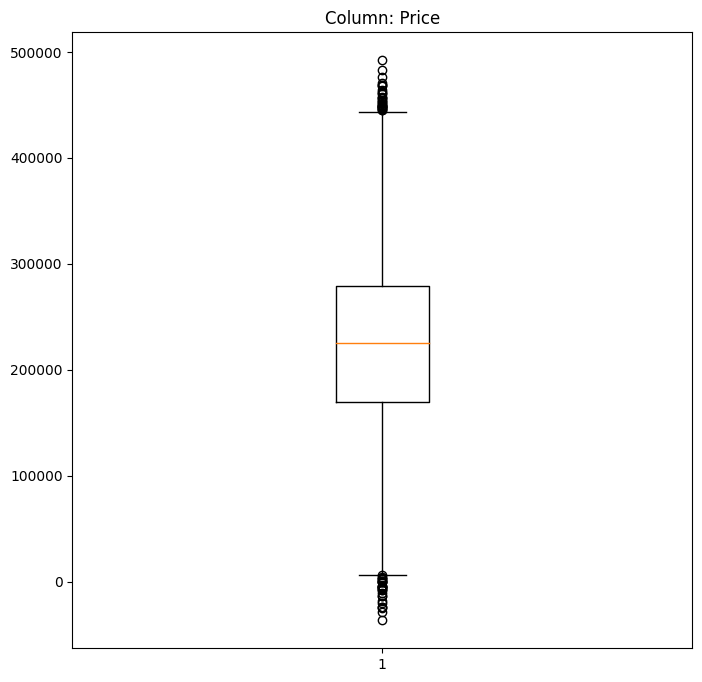

In [ ]:
plt.figure(figsize=(8,8))
plt.boxplot(df.Price)
plt.title('Column: Price')

ในการ plot เห็นว่า price มีค่าที่ติดลบ ซึ่งเป็น data ที่ไม่ต้องการ

In [ ]:
df['Neighborhood'].value_counts()

Suburb    16721
Rural     16676
Urban     16603
Name: Neighborhood, dtype: int64

###Data processing.

In [ ]:
#get dummy variable in  classification data column
Neighborhood = pd.get_dummies(df['Neighborhood'])
df = pd.concat([df, Neighborhood],axis=1)
df.drop(['Neighborhood'],axis=1,inplace=True)
df

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price,Rural,Suburb,Urban
0,2126,4,1,1969,215355.283618,1,0,0
1,2459,3,2,1980,195014.221626,1,0,0
2,1860,2,1,1970,306891.012076,0,1,0
3,2294,2,1,1996,206786.787153,0,0,1
4,2130,5,2,2001,272436.239065,0,1,0
...,...,...,...,...,...,...,...,...
49995,1282,5,3,1975,100080.865895,1,0,0
49996,2854,2,2,1988,374507.656727,0,1,0
49997,2979,5,3,1962,384110.555590,0,1,0
49998,2596,5,2,1984,380512.685957,1,0,0


In [ ]:
df.drop(df[df.Price < 0].index, axis=0, inplace=True) #remove negative price row

###Model

In [ ]:
#import library
import math
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
# variable selection
x = df[['SquareFeet','Bedrooms', 'YearBuilt','Bathrooms','Rural','Suburb','Urban']]
y = df["Price"]
print(x.shape)
print(y.shape)

(49978, 7)
(49978,)


In [ ]:
#testing data size is of 30% of entire data
x_train, x_test, y_train, y_test =train_test_split(x,y, test_size=0.3, random_state=101)

In [ ]:
#Linear regression model
lm = LinearRegression()
model = lm.fit(x_train,y_train)

In [ ]:
print(x.columns)
print(model.intercept_)
print(model.coef_)

Index(['SquareFeet', 'Bedrooms', 'YearBuilt', 'Bathrooms', 'Rural', 'Suburb',
       'Urban'],
      dtype='object')
37378.946454855846
[   99.36000078  4960.68032159   -17.20221503  2397.68762799
  -439.89276929 -1012.10362851  1451.99639779]


In [ ]:
#compare the data between Actual & Predict
y_pred = model.predict(x_test)
pd.DataFrame({"Actual": y_test, "Predict": y_pred}).head()

,Actual,Predict
26563,206078.890039,178683.266978
40280,205679.342808,239254.417578
19125,107720.481981,187516.533708
21352,267436.946617,301772.828031
10448,275940.275519,288872.211105


Text(0.5, 1.0, 'Test & Predicted')

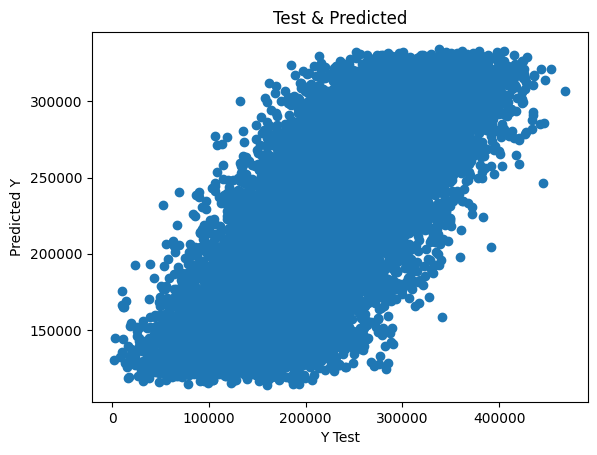

In [ ]:
#plot data point from model
plt.scatter(y_test,y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.title('Test & Predicted')

In [ ]:
# calculate MSE & mean
mse = sklearn.metrics.mean_squared_error(y_test, y_pred)
print('Root Mean Square Error :', math.sqrt(mse))
print('Test mean :', y_test.mean())

# R^2
print('R square :', model.score(x_test,y_test))

Root Mean Square Error : 49835.87033628695
Test mean : 225243.47162831647
R square : 0.5685883434644716


###*Conclusion*
From Linear regression model, I can get some values from model.
let X1 ='SquareFeet', X2 ='Bedrooms', X3 ='YearBuilt' ,X4='Bathrooms' , X5= 'Rural', X6 = 'Suburb', X7 = 'Urban' then I can get linear equation.
#equation:
y = 99.36000078*(X1)+4960.68032159*(X2)-17.20221503*(X3)+2397.68762799*(X4)-439.89276929*(X5)-1012.10362851*(X6)+1451.99639779*(X7)+37378.946454855846
#Root Mean Square Error :
49835.87033628695
#R square :
0.5685883434644716
